In [ ]:
# Analyse de la volatilité du Bitcoin par rapport au DollarCoin

# Librairies pythons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import datetime
import pylab

In [ ]:
# Imporation des données
data = pd.read_csv(r"data_BTC.csv", sep = ';')

custom_date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S") # Fonction qui permet de lire les données dans ce format
data = pd.read_csv('data_BTC.csv', sep=';',
                 parse_dates=['datetime'],
                date_parser=custom_date_parser) 

In [ ]:
# Quelques vérification sur les données
data.info()
data.shape # la base de données contient 104923 observations et 7 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104923 entries, 0 to 104922
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  104923 non-null  int64         
 1   open       104923 non-null  float64       
 2   high       104923 non-null  float64       
 3   low        104923 non-null  float64       
 4   close      104923 non-null  float64       
 5   volume     104923 non-null  float64       
 6   datetime   104923 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 5.6 MB


(104923, 7)

In [ ]:
# Fonction qui permet de calculer la variable R_p

vect = data.loc[:,'close'] # colonne close
R_p = []
for i in range(len(vect)-1): # on s'arrête à l'avant dernière valeur de close car la longueur de R_p n'est rien d'autre que la longueur de vect -1
    R_p.append((vect[i+1]/vect[i]) - 1) # la fonction append permet de concatener au fur et à mésure le resultat de l'opération entre parenthèse
#print(R_p) # affiche la variation relative du prix d'un BTC en USDC entre deux péridoes consécutives

# Par exemple : 
print(f"la variation relative du prix d'un BTC en USDC entre les périodes aux temps 0 et 5 est {R_p[0]};donc on remarque que pour cette période, cette valeur est négative d'où le BTC ne gagne pas en valeur par rapport à l'USDC")

la variation relative du prix d'un BTC en USDC entre les périodes aux temps 0 et 5 est -0.0035794814076834935;donc on remarque que pour cette période, cette valeur est négative d'où le BTC ne gagne pas en valeur par rapport à l'USDC


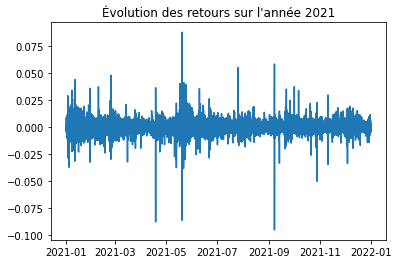

In [ ]:
# Question 1 : Évolution des rétours sur l'année 2021
oo = data.loc[:104921,'datetime']
data_new = pd.DataFrame({'retours':R_p,
                        'date': oo}) # J'ai crée une dataframe en combinant la colonne datetime de la base
                                   # initiale et le vecteur R_p afin de pouvoir indexer la colonne date
                                   # pour que les tracés soient en fonction de la date 
data_new.set_index('date', inplace=True)

plt.plot(data_new['retours'])
plt.title("Évolution des retours sur l'année 2021")
plt.show()


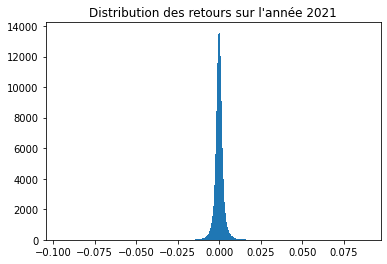

In [ ]:
# Question 2 : Distribution des retours sur l'année
plt.hist(data_new['retours'], bins=300)
plt.title("Distribution des retours sur l'année 2021")
plt.show()

In [ ]:
data_new

,retours
date,
2021-01-01 00:00:00,-0.003579
2021-01-01 00:05:00,-0.004299
2021-01-01 00:10:00,0.003278
2021-01-01 00:15:00,0.000047
2021-01-01 00:20:00,-0.000025
...,...
2021-12-31 23:30:00,-0.001718
2021-12-31 23:35:00,0.002304
2021-12-31 23:40:00,-0.002428


In [ ]:
# Question 3 : Écarts type empirique des retours
# la formule est la suivante : sqrt(1/N*sum_{i=1}^^{N} (R_i-mean(R_p))**2)) ici N=len(R_p)

def ecart_type(vect):
    N=len(vect)
    ec=[]
    for i in range(N):
        ec.append((vect[i] - np.mean(vect))**2)
    ec = np.sqrt(np.sum(ec)/N)
    return ec

print(f"On remarque que l'écart type de notre fonction {ecart_type(R_p[0:13])} est quasiment semblable à l'écart type en utilisant la std {np.std(R_p[0:13])}")


On remarque que l'écart type de notre fonction 0.0020542301057830522 est quasiment semblable à l'écart type en utilisant la std 0.0020542301057830522


In [ ]:
li = R_p[0:288] # On s'arrête à 288 car cela correspond aux variations relatives du prix d'un BTC sur une journée 
cut_li = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)] # C'est une fonction qui prend en argument une liste et un entier i et subdivise la liste en 
                                                                       # i valeurs égales.
result_li = cut_li(li,12) # On applique cette fonction sur notre liste li
print(result_li)
#len(result_li)


[[-0.0035794814076834935, -0.004298910919510401, 0.0032782216047237966, 4.673806396393587e-05, -2.527199416457737e-05, 0.0011781201315561596, 0.0009460898238979887, 0.0009690327533069532, 0.0007882809814443448, -2.103645583306779e-05, 0.0013232553944988457, 0.0023678286649511104], [0.0018434025259252973, 0.009117398509608465, -0.0035842366996473585, 0.0018800852177958127, 0.00216968406975937, -0.0004993771374274258, 0.0008860725505464018, -0.0027132535815627135, 0.002467980607556264, -0.00020210172204260246, 0.0009628101826859581, -0.0007741910958859455], [-0.00047180386002809716, -0.002895028292708157, 0.0013329416191338872, 0.001798488303188961, -0.0028379642354671164, -0.0022167298022388593, 0.0006515396551347585, 0.0007371118048455916, 0.0024102170286539604, -0.004516625481700842, -0.0004739762437775408, 0.0017019268903080143], [0.0008655591423318842, -1.807372305728805e-05, -0.0009354173281029832, -0.0002454228133306202, -0.0008641413436151213, 0.001234286089199399, -3.31058020478

In [ ]:
# Calcul de l'écart type empirique sur une journée
ec_empirique = []
for i in range(24):
    ec_empirique.append(ecart_type(result_li[i])) # On applique juste la fonction qui calcul l'écart type sur chaque sous liste de resul_li
print(ec_empirique)


[0.002091807669610847, 0.003062452495798307, 0.002140427444147959, 0.0008338484951440046, 0.001694571270154108, 0.0013528238700347402, 0.0013116903764987724, 0.001935480089509985, 0.001918079444039631, 0.0012050267119735605, 0.001082080820095272, 0.0012331797249277008, 0.003496392422982671, 0.0012250574791169181, 0.0009967029325150683, 0.002315043799315529, 0.0009736720319389526, 0.002819709632999163, 0.0024492744412111405, 0.0012821910553112992, 0.0008193554495099957, 0.0007825145453744291, 0.0009107254190283691, 0.001495972614109348]


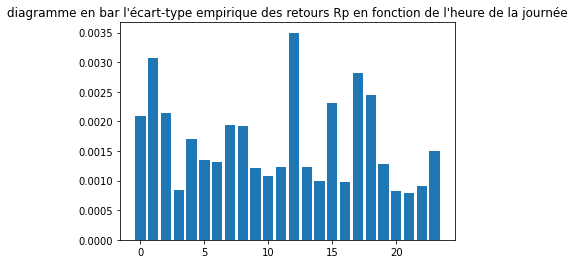

In [ ]:
x = np.arange(0,24)
plt.bar(x,ec_empirique); 
plt.title("diagramme en bar l'écart-type empirique des retours Rp en fonction de l'heure de la journée")
plt.show()

In [ ]:
# Question 4 : 

# Rq : la fonction ecart_type et cut_li ne changeront pas. 
# Par contre les arguments de la fonction cut_li vont changer.
# Ici l'argument lst sera R_p car cela correspond aux variations relatives du prix d'un BTC sur l'année.
# L'argument sz sera par contre 8760. Je l'ai obtenu en faisant la règle de trois i.e : si pour 60 minutes 
# on a 12 valeurs alors pour 43800 minutes (qui correspond à 1 mois) on aura : y = 43800*12/60 = 8760 valeurs (c'est l'expression approximative).
# D'où, on doit subdiviser la liste R_p en 8760 valeurs i.e : pour le mois de janvier on aura : [R_0,...,R_8759] etc ...
# Tous les mois de l'année ne sont pas du même nombre de jour donc nos sous vecteurs n'auront pas forcement
# le même nombre d'élement.

result_R_p = cut_li(R_p,8760) # On applique cette fonction sur notre liste R_p
print(len(result_R_p))


12


In [ ]:
# Calcul de l'écart type empirique en fonction du mois de l'année
ec_empirique_month = []
for i in range(12):
    ec_empirique_month.append(ecart_type(result_R_p[i])) # On applique juste la fonction qui calcule l'écart type sur chaque sous liste de resul_R_p
print(ec_empirique_month)

[0.004520902182282667, 0.0034136591263315987, 0.002506761571635009, 0.0025020884376405848, 0.004903276885565548, 0.003041896648342122, 0.002134073123195198, 0.0019803208844712634, 0.00261310094560664, 0.0020249160452249625, 0.0019677462720481516, 0.0021703074230790503]


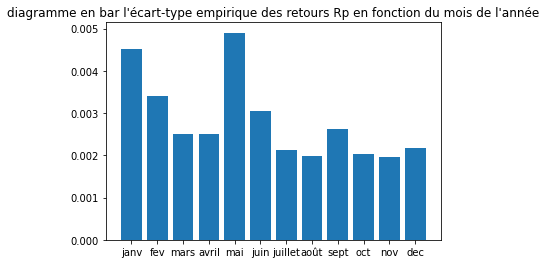

In [ ]:
x1 = ['janv','fev','mars','avril','mai','juin','juillet','août','sept','oct','nov','dec']
plt.bar(x1,ec_empirique_month); 
plt.title("diagramme en bar l'écart-type empirique des retours Rp en fonction du mois de l'année")
plt.show()

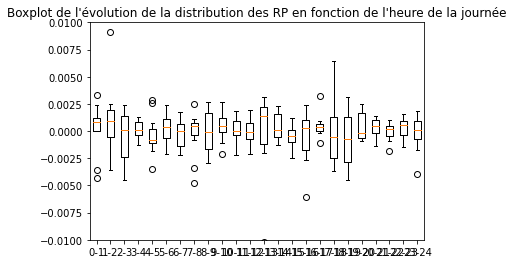

In [ ]:
# Question 5
# a.) évolution de la distribution des RP en fonction de l'heure de la journée à l'aide d'un boxplot
BoxName = ['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
'15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24']


plt.boxplot(result_li)

plt.ylim(-0.01,0.01)

pylab.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], BoxName)
plt.title("Boxplot de l'évolution de la distribution des RP en fonction de l'heure de la journée")
plt.show()

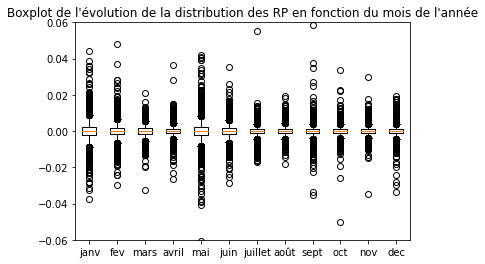

In [ ]:
#b.) évolution de la distribution des RP en fonction du mois de l'année à l'aide d'un boxplot
BoxName = ['janv','fev','mars','avril','mai','juin','juillet','août','sept','oct','nov','dec']

plt.boxplot(result_R_p)

plt.ylim(-0.06,0.06)

pylab.xticks([1,2,3,4,5,6,7,8,9,10,11,12], BoxName)
plt.title("Boxplot de l'évolution de la distribution des RP en fonction du mois de l'année")
plt.show()

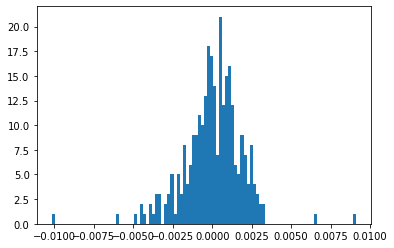

In [ ]:
# Question 6 : Interprétation


plt.hist(li, bins=100)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=76a18eaa-d821-44bd-885c-6327986aadd0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>